# Pertanyaan Bisnis




*   Bagaimana korelasi antara konsentrasi CO dan NO2 di kedua stasiun?
*  Bagaimana distribusi suhu udara di kedua lokasi selama periode waktu tersebut?
*  Bagaimana distribusi konsentrasi O3 di dua stasiun tersebut?










In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data_aot = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data_chang = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')

In [5]:
print(data_aot.head())
print(data_chang.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013 

In [6]:
#pengecekan missing value

print(data_aot.isnull().sum())
print(data_chang.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


# Exploratory Data Analysisis (EDA)

In [7]:
print(data_aot.describe())
print(data_chang.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017    

### Pertanyaan 1

In [8]:
# Memilih kolom yang diperlukan (CO dan NO2)
selected_columns = ['CO', 'NO2']

In [9]:
# Membuat sub-dataframe untuk masing-masing stasiun
data_aot_selected = data_aot[selected_columns]
data_chang_selected = data_chang[selected_columns]

In [10]:
# Menggabungkan data kedua stasiun
merged_data = pd.concat([data_aot_selected, data_chang_selected], keys=['Aotizhongxin', 'Changping'], axis=1)

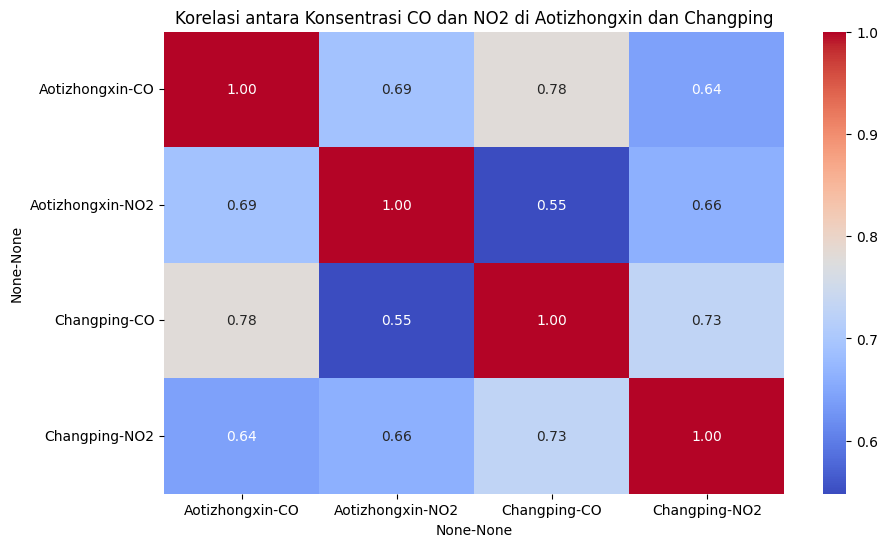

In [11]:
# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Konsentrasi CO dan NO2 di Aotizhongxin dan Changping')
plt.show()

### Pertanyaan 2

In [12]:
print(data_aot.columns)
print(data_chang.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [13]:
assert 'year' in data_aot.columns
assert 'month' in data_aot.columns
assert 'day' in data_aot.columns
assert 'hour' in data_aot.columns

In [14]:
data_aot['date'] = pd.to_datetime(data_aot[['year', 'month', 'day', 'hour']])
data_chang['date'] = pd.to_datetime(data_chang[['year', 'month', 'day', 'hour']])

In [15]:
data_aot['date'] = pd.to_datetime(data_aot['date'])
data_chang['date'] = pd.to_datetime(data_chang['date'])

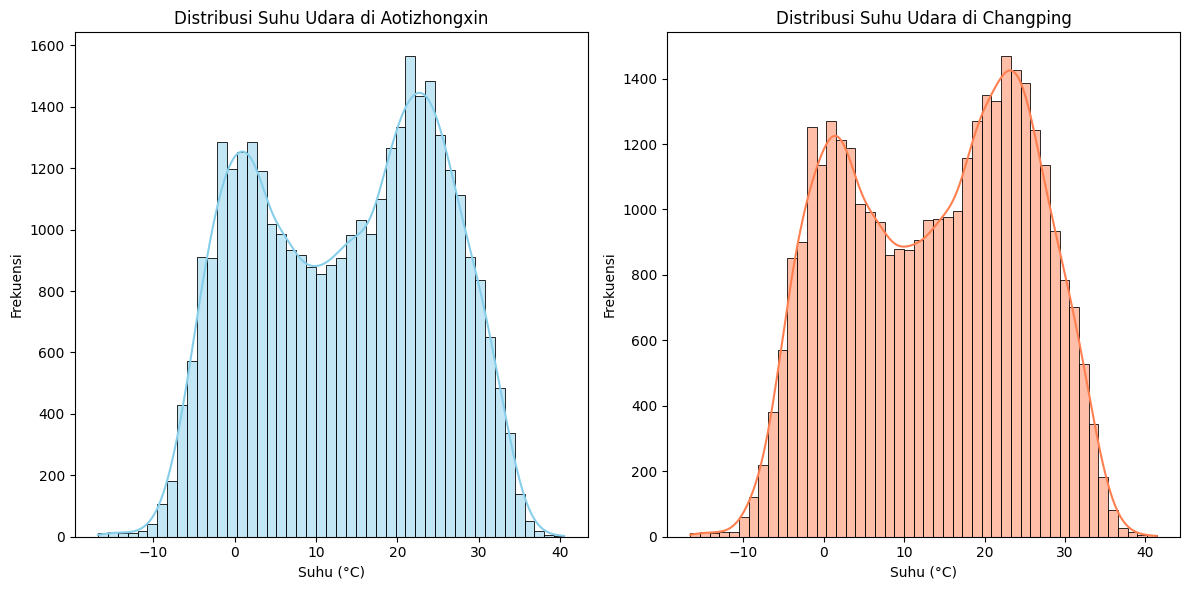

In [16]:
# Visualisasi distribusi suhu udara menggunakan histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_aot['TEMP'].dropna(), kde=True, color='skyblue')
plt.title('Distribusi Suhu Udara di Aotizhongxin')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(data_chang['TEMP'].dropna(), kde=True, color='coral')
plt.title('Distribusi Suhu Udara di Changping')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Pertanyaan 3

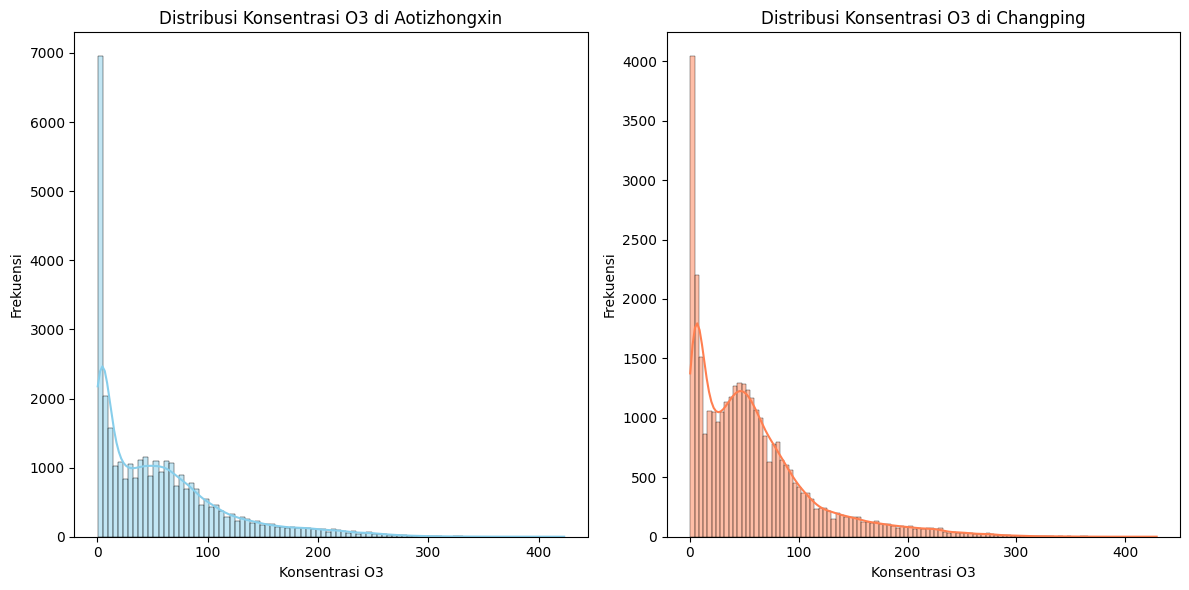

In [17]:
# Visualisasi distribusi konsentrasi O3 menggunakan histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_aot['O3'].dropna(), kde=True, color='skyblue')
plt.title('Distribusi Konsentrasi O3 di Aotizhongxin')
plt.xlabel('Konsentrasi O3')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(data_chang['O3'].dropna(), kde=True, color='coral')
plt.title('Distribusi Konsentrasi O3 di Changping')
plt.xlabel('Konsentrasi O3')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Conlusion


**Pertanyaan 1:** Berdasarkan visualisasi kita mendapatkan pemahaman bahwa:
- Terdapat korelasi positif antara konsentrasi CO dan NO2 di kedua stasiun. Ini menunjukkan bahwa ketika konsentrasi CO naik, konsentrasi NO2 juga cenderung naik, dan sebaliknya.
- Korelasi tersebut dapat bervariasi antara dua stasiun, dengan perbedaan warna pada heatmap menunjukkan tingkat korelasi yang berbeda.

**Pertanyaan 2:** Berdasarkan visualisasi kita mendapatkan pemahaman bahwa:
- Distribusi suhu udara di Aotizhongxin dan Changping menunjukkan perbedaan pola suhu di kedua lokasi.
- Aotizhongxin: Suhu udara cenderung memiliki distribusi yang lebih tinggi di beberapa rentang tertentu
- Changping: Distribusi suhu udara di Changping mungkin memiliki - variasi yang lebih luas atau berbeda pola distribusi

**Pertanyaan 3:** Berdasarkan visualisasi kita mendapatkan pemahaman bahwa:
- Terdapat perbedaan dalam distribusi konsentrasi O3 antara stasiun Aotizhongxin dan Changping.
- Aotizhongxin: Mungkin menunjukkan pola atau tren tertentu dalam konsentrasi O3.
- Changping: Distribusi konsentrasi O3 di Changping mungkin memiliki karakteristik yang berbeda.